In [1]:
import vectorbt as vbt
import numpy as np
from itertools import combinations, product
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt

/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


In [2]:

symbol = "BTCUSDT"
interval = '1m'

In [3]:
df = pd.read_csv('../../adata/' + symbol + '_' + interval + '.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df

,close,open,high,low,volume
timestamp,,,,,
2023-01-11 19:58:00+00:00,17545.69,17543.06,17550.46,17542.01,247.88290
2023-01-11 19:59:00+00:00,17550.29,17545.70,17553.63,17544.17,236.79705
2023-01-11 20:00:00+00:00,17566.21,17549.62,17568.79,17548.54,696.93259
2023-01-11 20:01:00+00:00,17561.72,17566.21,17581.75,17555.54,839.44272
2023-01-11 20:02:00+00:00,17551.32,17561.54,17576.57,17550.01,411.41862
...,...,...,...,...,...
2025-01-11 19:53:00+00:00,94178.80,94142.01,94178.81,94142.01,5.48458
2025-01-11 19:54:00+00:00,94204.00,94178.81,94204.00,94178.80,3.67669
2025-01-11 19:55:00+00:00,94236.19,94204.00,94236.19,94203.99,1.88912


In [4]:
# Shift the 'Close' column to get the price 24 periods back
df['close24h'] = df['close'].shift(1440)
df['close1w'] = df['close'].shift(10080)

# Calculate the percentage change
df['close24h_pct'] = ((df['close'] - df['close24h']) / df['close24h']) * 100
df['close1w_pct'] = ((df['close'] - df['close1w']) / df['close1w']) * 100
df.dropna(inplace=True)
df.describe()


,close,open,high,low,volume,close24h,close1w,close24h_pct,close1w_pct
count,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06,1.042480e+06
mean,4.882990e+04,4.882983e+04,4.884652e+04,4.881289e+04,4.367486e+01,4.872876e+04,4.809152e+04,2.377424e-01,1.758190e+00
std,2.206324e+04,2.206321e+04,2.207266e+04,2.205366e+04,9.849851e+01,2.202176e+04,2.172509e+04,2.510792e+00,7.019523e+00
min,1.959512e+04,1.959707e+04,1.961887e+04,1.954909e+04,0.000000e+00,1.959512e+04,1.751755e+04,-1.886913e+01,-2.930427e+01
25%,2.809106e+04,2.809105e+04,2.810000e+04,2.808030e+04,7.507395e+00,2.806658e+04,2.793800e+04,-1.017642e+00,-2.489286e+00
50%,4.319785e+04,4.319780e+04,4.320931e+04,4.318600e+04,1.594583e+01,4.315605e+04,4.294859e+04,9.200736e-02,8.059637e-01
75%,6.496035e+04,6.496027e+04,6.498600e+04,6.493551e+04,3.659750e+01,6.489524e+04,6.447001e+04,1.336461e+00,5.104961e+00
max,1.082584e+05,1.082584e+05,1.083530e+05,1.081680e+05,5.877775e+03,1.082584e+05,1.082584e+05,2.030610e+01,3.849614e+01


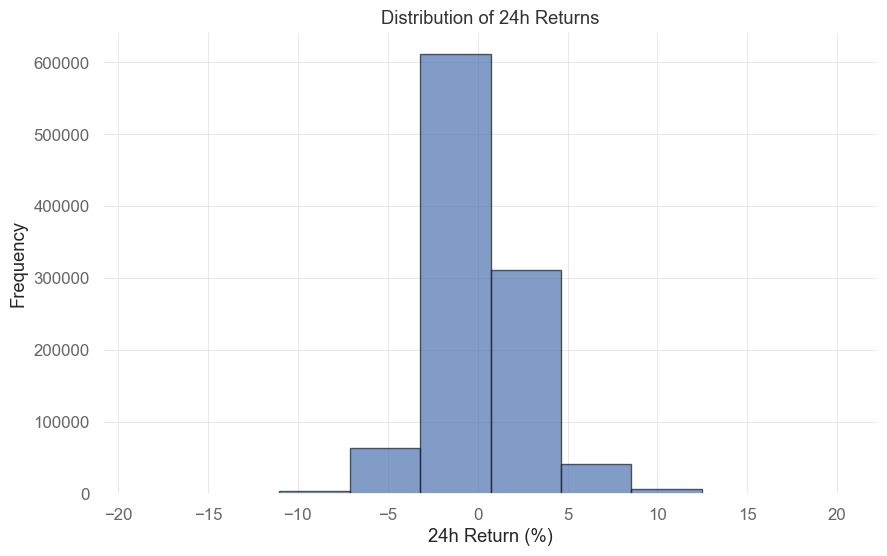

In [5]:
# Plot the distribution of log returns
plt.figure(figsize=(10, 6))
plt.hist(df['close24h_pct'].dropna(), bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of 24h Returns')
plt.xlabel('24h Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

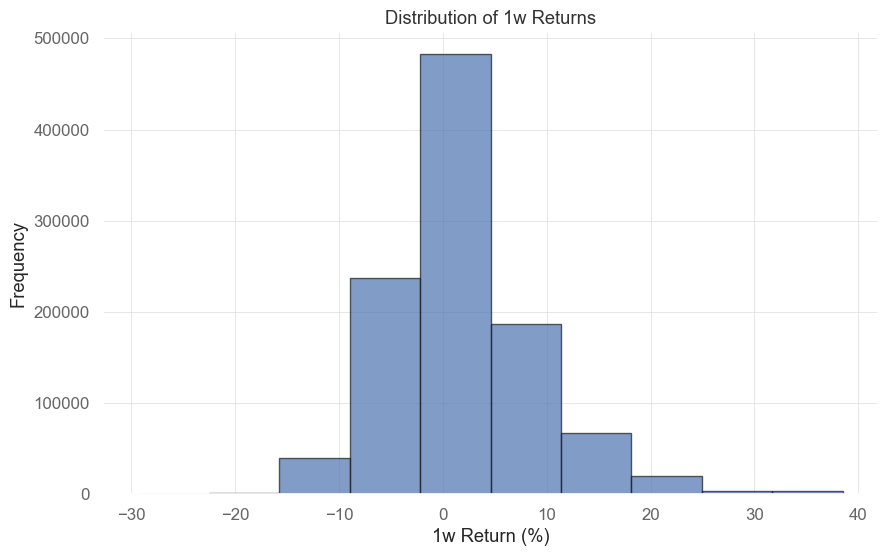

In [6]:
# Plot the distribution of log returns
plt.figure(figsize=(10, 6))
plt.hist(df['close1w_pct'].dropna(), bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of 1w Returns')
plt.xlabel('1w Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

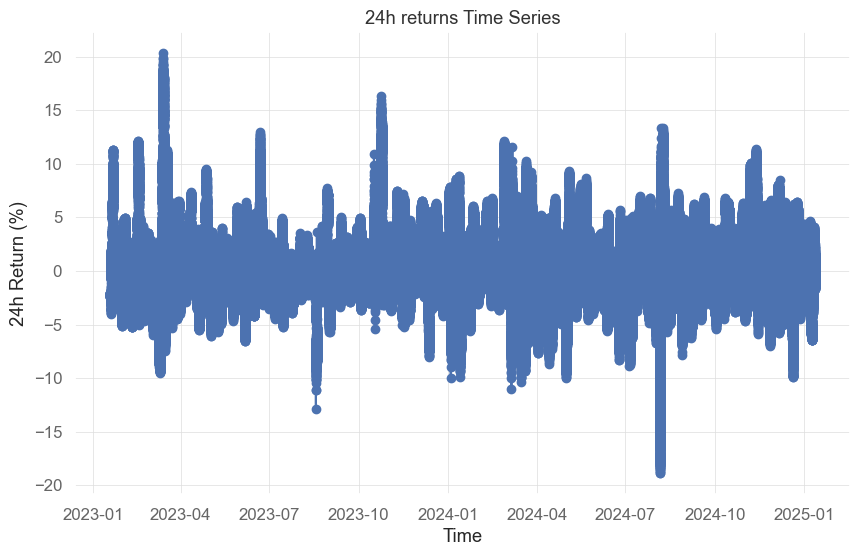

In [7]:
# Plot the log return as a time series
plt.figure(figsize=(10, 6))
plt.plot(df['close24h_pct'], marker='o', linestyle='-', color='b')
plt.title('24h returns Time Series')
plt.xlabel('Time')
plt.ylabel('24h Return (%)')
plt.grid(True)
plt.show()

In [ ]:
# Plot the log return as a time series
plt.figure(figsize=(10, 6))
plt.plot(df['close1w_pct'], marker='o', linestyle='-', color='b')
plt.title('Return weekly as Time Series')
plt.xlabel('Time')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()